In [94]:
import tensorflow as tf
import keras
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 

data = []
labels = []


shared_dir = '/Users/prateek/Desktop/ML/Major/augmented/'
infected_dir = shared_dir + 'True_parasitized/'
uninfected_dir = shared_dir + 'True_uninfected/'
input_shape = [32, 32]
batch = 32

def reading(path):
    mode = cv2.IMREAD_GRAYSCALE
    img_read = cv2.imread(path)#, mode)
    # img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)
    img_read = np.float32(img_read)
    img_read = cv2.cvtColor(img_read, cv2.COLOR_BGR2HSV_FULL)
    img_resize = cv2.resize(img_read, input_shape)
    return img_resize

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)

max_i = 3
i = 0
for img in parasitized_data:
    i+= 1
    if i == max_i:
        break
    try:
        data.append(reading(infected_dir + img))
        labels.append(1)
    except Exception as e:
        print(e)
    
i = 0
for img in uninfected_data:
    i+= 1
    if i == max_i:
        break
    try:
        data.append(reading(uninfected_dir + img))
        labels.append(0)
    except Exception as e:
        print(e)

shared_dir = '/Users/prateek/Desktop/ML/Major/augmented/'
infected_dir = shared_dir + 'False_uninfected/'
uninfected_dir = shared_dir + 'False_parasitized/'

parasitized_data = os.listdir(infected_dir)
uninfected_data = os.listdir(uninfected_dir)


i = 0
for img in parasitized_data:
    i+= 1
    if i == max_i:
        break
    try:
        data.append(reading(infected_dir + img))
        labels.append(1)
    except Exception as e:
        print(e)
        
i = 0
for img in uninfected_data:
    i+= 1
    if i == max_i:
        break
    try:
        data.append(reading(uninfected_dir + img))
        labels.append(0)
    except Exception as e:
        print(e)

image_data = np.array(data)
labels = np.array(labels)
# input_shape.append(3)

print("image_shape:", input_shape)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_shape: [32, 32]
image_data: 8
labels: 8


In [95]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.1,random_state = 0)

y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 7
X_test: 1
y_train: 7
y_test: 1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


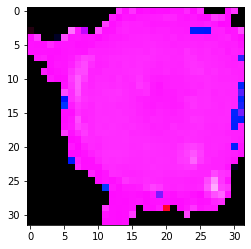

In [96]:
plt.imshow(image_data[4])

(0.0, 0.32935431599617004, (0, 0), (31, 23))


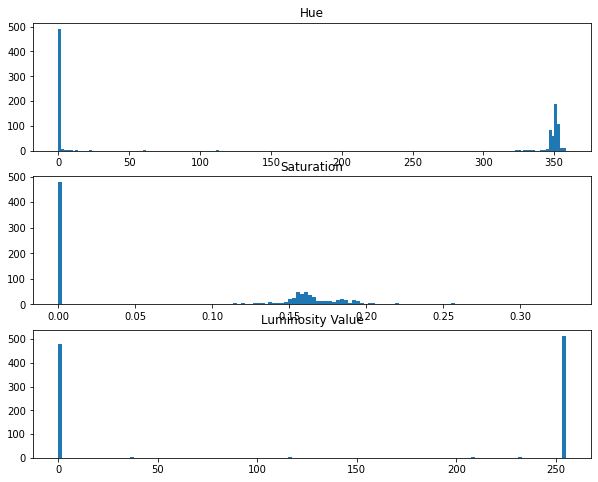

In [98]:
image = X_train[1]
H, S, V = image[:,:,0],image[:,:,1],image[:,:,2]
mm = cv2.minMaxLoc(S)
print(mm)

plt.figure(figsize=(10,8))
plt.subplot(311)                             #plot in the first cell
plt.subplots_adjust(hspace=.5)
plt.title("Hue")
plt.hist(np.ndarray.flatten(H), bins=180)
plt.subplot(312)                             #plot in the second cell
plt.title("Saturation")
plt.hist(np.ndarray.flatten(S), bins=128)
plt.subplot(313)                             #plot in the third cell
plt.title("Luminosity Value")
plt.hist(np.ndarray.flatten(V), bins=128)
plt.show()

dict_keys(['loss', 'accuracy', 'binary_accuracy', 'val_loss', 'val_accuracy', 'val_binary_accuracy'])


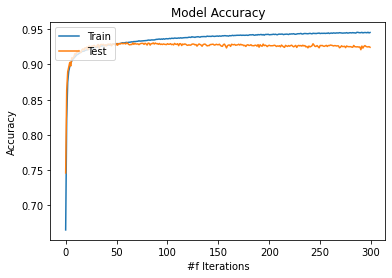

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

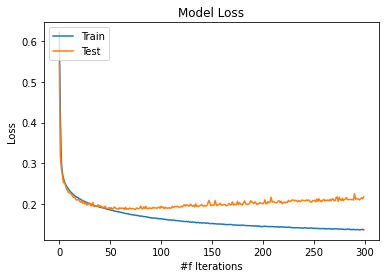

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
from keras.models import Model

new_model=Model(inputs=model.input,outputs=model.get_layer('feature_extractor').output)
train_x=new_model.predict(X_train)
X_test=X_test.reshape(X_test.shape[0],32,32,3)
test_x=new_model.predict(X_test)
print(test_x.shape)

2022-04-16 22:14:47.814190: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(25298, 16)


In [ ]:
train_y=[ np.where(r==1)[0][0] for r in y_train ]
print(len(train_y))

227675


In [ ]:

from sklearn.svm import SVC

svm=SVC()
svm.fit(train_x,train_y)
svm.score(train_x,train_y)
svm_predict=svm.predict(test_x)

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(confusion_matrix( y_test[:,1], svm_predict ))
print( precision_score( y_test[:,1], svm_predict, average='micro') )
print( recall_score( y_test[:,1], svm_predict, average='micro') )

[[10148   635]
 [ 1306 13209]]
0.9232745671594592
0.9232745671594592
